In [ ]:
# colab imports
!pip install geopandas
!pip install mapclassify

import geopandas as gpd
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt
import pandas as pd
import mapclassify as mc

from google.colab import drive
import pandas as pd
import numpy as np
from datetime import datetime as dt
import requests
import urllib.parse

In [ ]:
ST42GDF = gpd.read_file("/content/drive/MyDrive/Junior Year/IW 07/State Census Tract Shapefiles/tl_2016_42_tract/tl_2016_42_tract.shx")
ST42GDF.set_index('GEOID', inplace=True)
ST42GDF.tail()

,STATEFP,COUNTYFP,TRACTCE,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
GEOID,,,,,,,,,,,,
42101035200,42,101,035200,352,Census Tract 352,G5020,S,1838258,27873,+40.0553000,-074.9901521,"POLYGON ((-75.00480 40.05475, -75.00299 40.056..."
42101980300,42,101,980300,9803,Census Tract 9803,G5020,S,7596036,22734,+40.0811422,-075.0113551,"POLYGON ((-75.02895 40.08097, -75.02784 40.082..."
42101035500,42,101,035500,355,Census Tract 355,G5020,S,2290052,1067,+40.0911285,-075.0293244,"POLYGON ((-75.04149 40.08734, -75.03824 40.089..."
42101035800,42,101,035800,358,Census Tract 358,G5020,S,1757642,2013,+40.1213169,-075.0257898,"POLYGON ((-75.03784 40.12021, -75.03755 40.120..."
42101035900,42,101,035900,359,Census Tract 359,G5020,S,2244712,2511,+40.1091461,-075.0163486,"POLYGON ((-75.02840 40.10355, -75.02771 40.105..."


In [ ]:
# read year file
GDF14 = pd.read_pickle("/content/drive/MyDrive/Junior Year/IW 07/Processed Gun Archive + County Data/2014.pkl")

In [ ]:
# read and process poverty file
povDF = pd.read_csv("/content/drive/MyDrive/Junior Year/IW 07/PHIPOV.csv")
ST42GDF = ST42GDF.assign(PCTPOV=pd.Series(np.zeros(len(ST42GDF))).values)
ST42GDF = ST42GDF.assign(NUMPOV=pd.Series(np.zeros(len(ST42GDF))).values)

povDF.set_index('GEO_ID', inplace=True)
povDF.head()

for i in ST42GDF[ST42GDF['COUNTYFP']=='101'].index:
  ST42GDF.loc[i, 'PCTPOV'] = povDF.loc['{}{}'.format('1400000US', i), 'PCTPOV']
  ST42GDF.loc[i, 'NUMPOV'] = povDF.loc['{}{}'.format('1400000US', i), 'NUMPOV']

ST42GDF[ST42GDF['COUNTYFP']=='101'].head()

,STATEFP,COUNTYFP,TRACTCE,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,PCTPOV,NUMPOV
GEOID,,,,,,,,,,,,,,
42101036501,42,101,036501,365.01,Census Tract 365.01,G5020,S,1816210,7168,+40.1288937,-075.0122761,"POLYGON ((-75.02371 40.13005, -75.02301 40.130...",9.9,4891.0
42101000801,42,101,000801,8.01,Census Tract 8.01,G5020,S,99957,12755,+39.9497374,-075.1804054,"POLYGON ((-75.18329 39.94951, -75.18166 39.951...",13.0,1588.0
42101036700,42,101,036700,367,Census Tract 367,G5020,S,801977,0,+39.9607248,-075.1439885,"POLYGON ((-75.14908 39.95656, -75.14904 39.956...",5.8,2984.0
42101037800,42,101,037800,378,Census Tract 378,G5020,S,3789732,1907951,+39.9805802,-075.0956845,"POLYGON ((-75.12349 39.97265, -75.12348 39.972...",21.5,2614.0
42101037600,42,101,037600,376,Census Tract 376,G5020,S,717210,0,+39.9599006,-075.1551643,"POLYGON ((-75.16232 39.95793, -75.16229 39.958...",39.2,2983.0


In [ ]:
racDF = pd.read_csv("/content/drive/MyDrive/Junior Year/IW 07/PHIRAC.csv")
ST42GDF = ST42GDF.assign(WHTPCT=pd.Series(np.zeros(len(ST42GDF))).values)
ST42GDF = ST42GDF.assign(BLKPCT=pd.Series(np.zeros(len(ST42GDF))).values)

racDF.set_index('GEO_ID', inplace=True)
racDF.head()

for i in ST42GDF[ST42GDF['COUNTYFP']=='101'].index:
  ST42GDF.loc[i, 'WHTPCT'] = racDF.loc['{}{}'.format('1400000US', i), 'WHTPCT']
  ST42GDF.loc[i, 'BLKPCT'] = racDF.loc['{}{}'.format('1400000US', i), 'BLKPCT']

ST42GDF[ST42GDF['COUNTYFP']=='101'].head()

,STATEFP,COUNTYFP,TRACTCE,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,PCTPOV,NUMPOV,WHTPCT,BLKPCT
GEOID,,,,,,,,,,,,,,,,
42101036501,42,101,036501,365.01,Census Tract 365.01,G5020,S,1816210,7168,+40.1288937,-075.0122761,"POLYGON ((-75.02371 40.13005, -75.02301 40.130...",9.9,4891.0,79.87,11.14
42101000801,42,101,000801,8.01,Census Tract 8.01,G5020,S,99957,12755,+39.9497374,-075.1804054,"POLYGON ((-75.18329 39.94951, -75.18166 39.951...",13.0,1588.0,88.31,0.73
42101036700,42,101,036700,367,Census Tract 367,G5020,S,801977,0,+39.9607248,-075.1439885,"POLYGON ((-75.14908 39.95656, -75.14904 39.956...",5.8,2984.0,81.76,8.36
42101037800,42,101,037800,378,Census Tract 378,G5020,S,3789732,1907951,+39.9805802,-075.0956845,"POLYGON ((-75.12349 39.97265, -75.12348 39.972...",21.5,2614.0,90.18,5.74
42101037600,42,101,037600,376,Census Tract 376,G5020,S,717210,0,+39.9599006,-075.1551643,"POLYGON ((-75.16232 39.95793, -75.16229 39.958...",39.2,2983.0,46.85,18.92


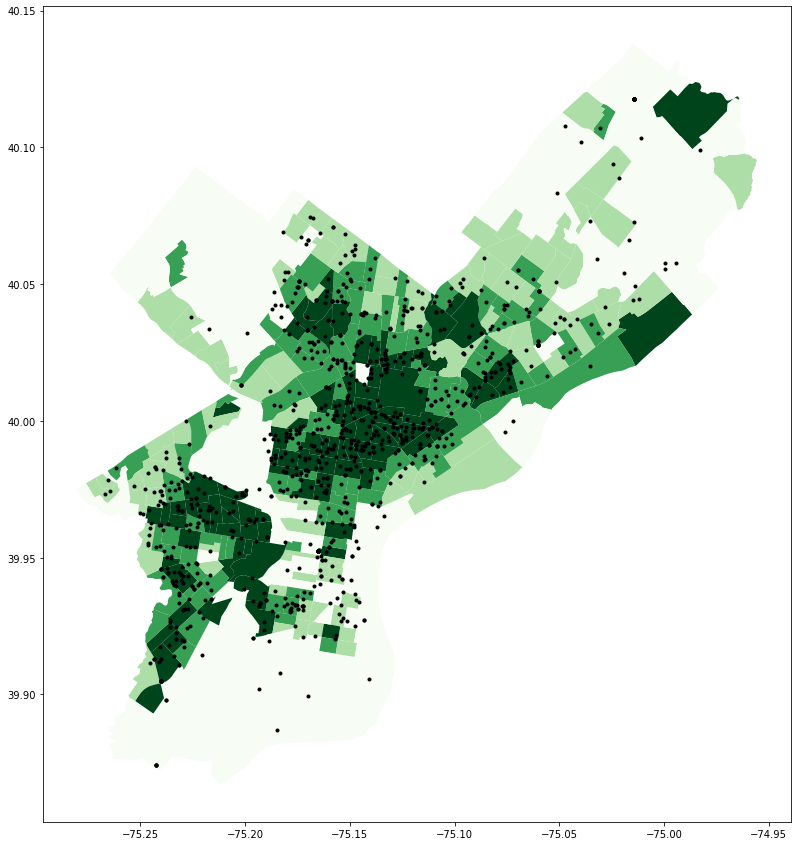

In [ ]:
fig, ax = plt.subplots(figsize=(15, 15))
ST42GDF[ST42GDF['COUNTYFP']=='101'].plot(column='PCTPOV', cmap='Greens', ax=ax, scheme="boxplot")

# iterate through year file
for incident in GDF14.loc['42101', 'incidentList']:
  plt.plot(incident['longitude'], incident['latitude'], 'k.')

plt.show()

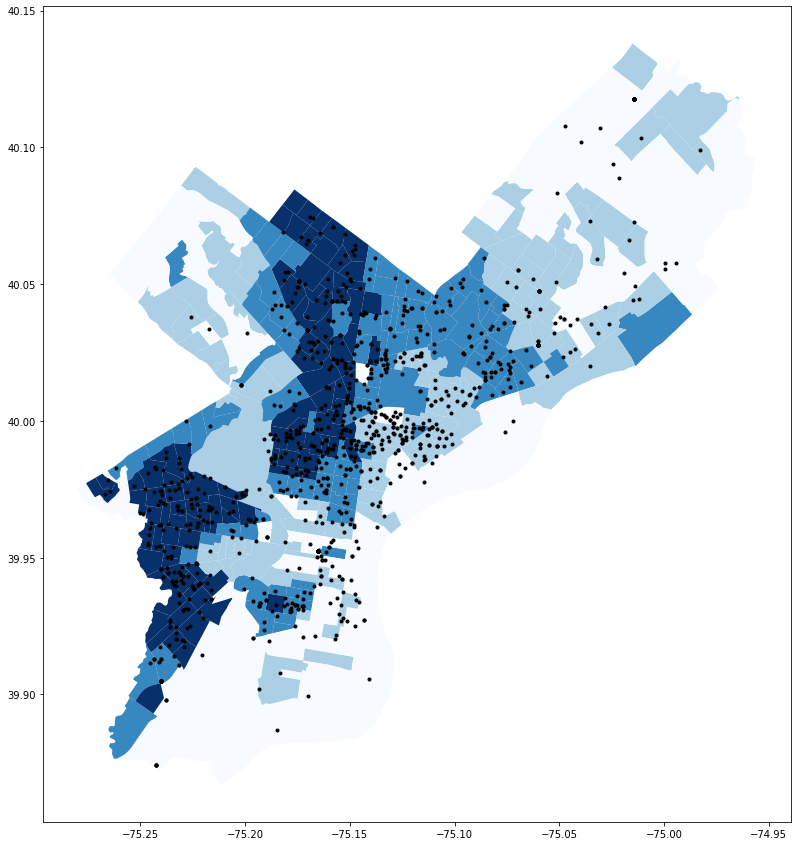

In [ ]:
fig, ax = plt.subplots(figsize=(15, 15))
ST42GDF[ST42GDF['COUNTYFP']=='101'].plot(column='BLKPCT', cmap='Blues', ax=ax, scheme="boxplot")

# iterate through year file
for incident in GDF14.loc['42101', 'incidentList']:
  plt.plot(incident['longitude'], incident['latitude'], 'k.')

plt.show()

In [ ]:
ST17GDF = gpd.read_file("/content/drive/MyDrive/Junior Year/IW 07/State Census Tract Shapefiles/tl_2016_17_tract/tl_2016_17_tract.shx")
ST17GDF.set_index('GEOID', inplace=True)
ST17GDF.tail()

In [ ]:
# read and process edu file
eduDF = pd.read_csv("/content/drive/MyDrive/Junior Year/IW 07/CHIEDU.csv")
ST17GDF = ST17GDF.assign(HIPCT=pd.Series(np.zeros(len(ST17GDF))).values)
ST17GDF = ST17GDF.assign(NHIPCT=pd.Series(np.zeros(len(ST17GDF))).values)

eduDF.set_index('GEO_ID', inplace=True)
eduDF.head()

for i in ST17GDF[ST17GDF['COUNTYFP']=='031'].index:
  ST17GDF.loc[i, 'NHIPCT'] = eduDF.loc['{}{}'.format('1400000US', i), 'NHIPCT']
  ST17GDF.loc[i, 'HIPCT'] = eduDF.loc['{}{}'.format('1400000US', i), 'HIPCT']

ST17GDF[ST17GDF['COUNTYFP']=='031'].head()

In [ ]:
# read and process inc file
incDF = pd.read_csv("/content/drive/MyDrive/Junior Year/IW 07/CHIINC.csv")
ST17GDF = ST17GDF.assign(MEDINC=pd.Series(np.zeros(len(ST17GDF))).values)

incDF.set_index('GEO_ID', inplace=True)
incDF.head()

for i in ST17GDF[ST17GDF['COUNTYFP']=='031'].index:
  ST17GDF.loc[i, 'MEDINC'] = incDF.loc['{}{}'.format('1400000US', i), 'MEDINC']

ST17GDF[ST17GDF['COUNTYFP']=='031'].head()

,STATEFP,COUNTYFP,TRACTCE,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,HIPCT,NHIPCT,MEDINC
GEOID,,,,,,,,,,,,,,,
17031221000,17,031,221000,2210,Census Tract 2210,G5020,S,220053,0,+41.9209604,-087.7152526,"POLYGON ((-87.71699 41.92460, -87.71675 41.924...",15.4,26.2,42818.0
17031221100,17,031,221100,2211,Census Tract 2211,G5020,S,440042,0,+41.9210205,-087.7103609,"POLYGON ((-87.71374 41.92464, -87.71366 41.924...",17.6,7.6,43750.0
17031242800,17,031,242800,2428,Census Tract 2428,G5020,S,439630,0,+41.8926320,-087.6903237,"POLYGON ((-87.69670 41.89565, -87.69646 41.895...",38.5,15.4,63869.0
17031242900,17,031,242900,2429,Census Tract 2429,G5020,S,323819,0,+41.8921955,-087.6842896,"POLYGON ((-87.68684 41.89574, -87.68635 41.895...",0.0,9.5,52361.0
17031243000,17,031,243000,2430,Census Tract 2430,G5020,S,324548,0,+41.8922753,-087.6793981,"POLYGON ((-87.68195 41.89583, -87.68146 41.895...",30.0,19.8,66063.0


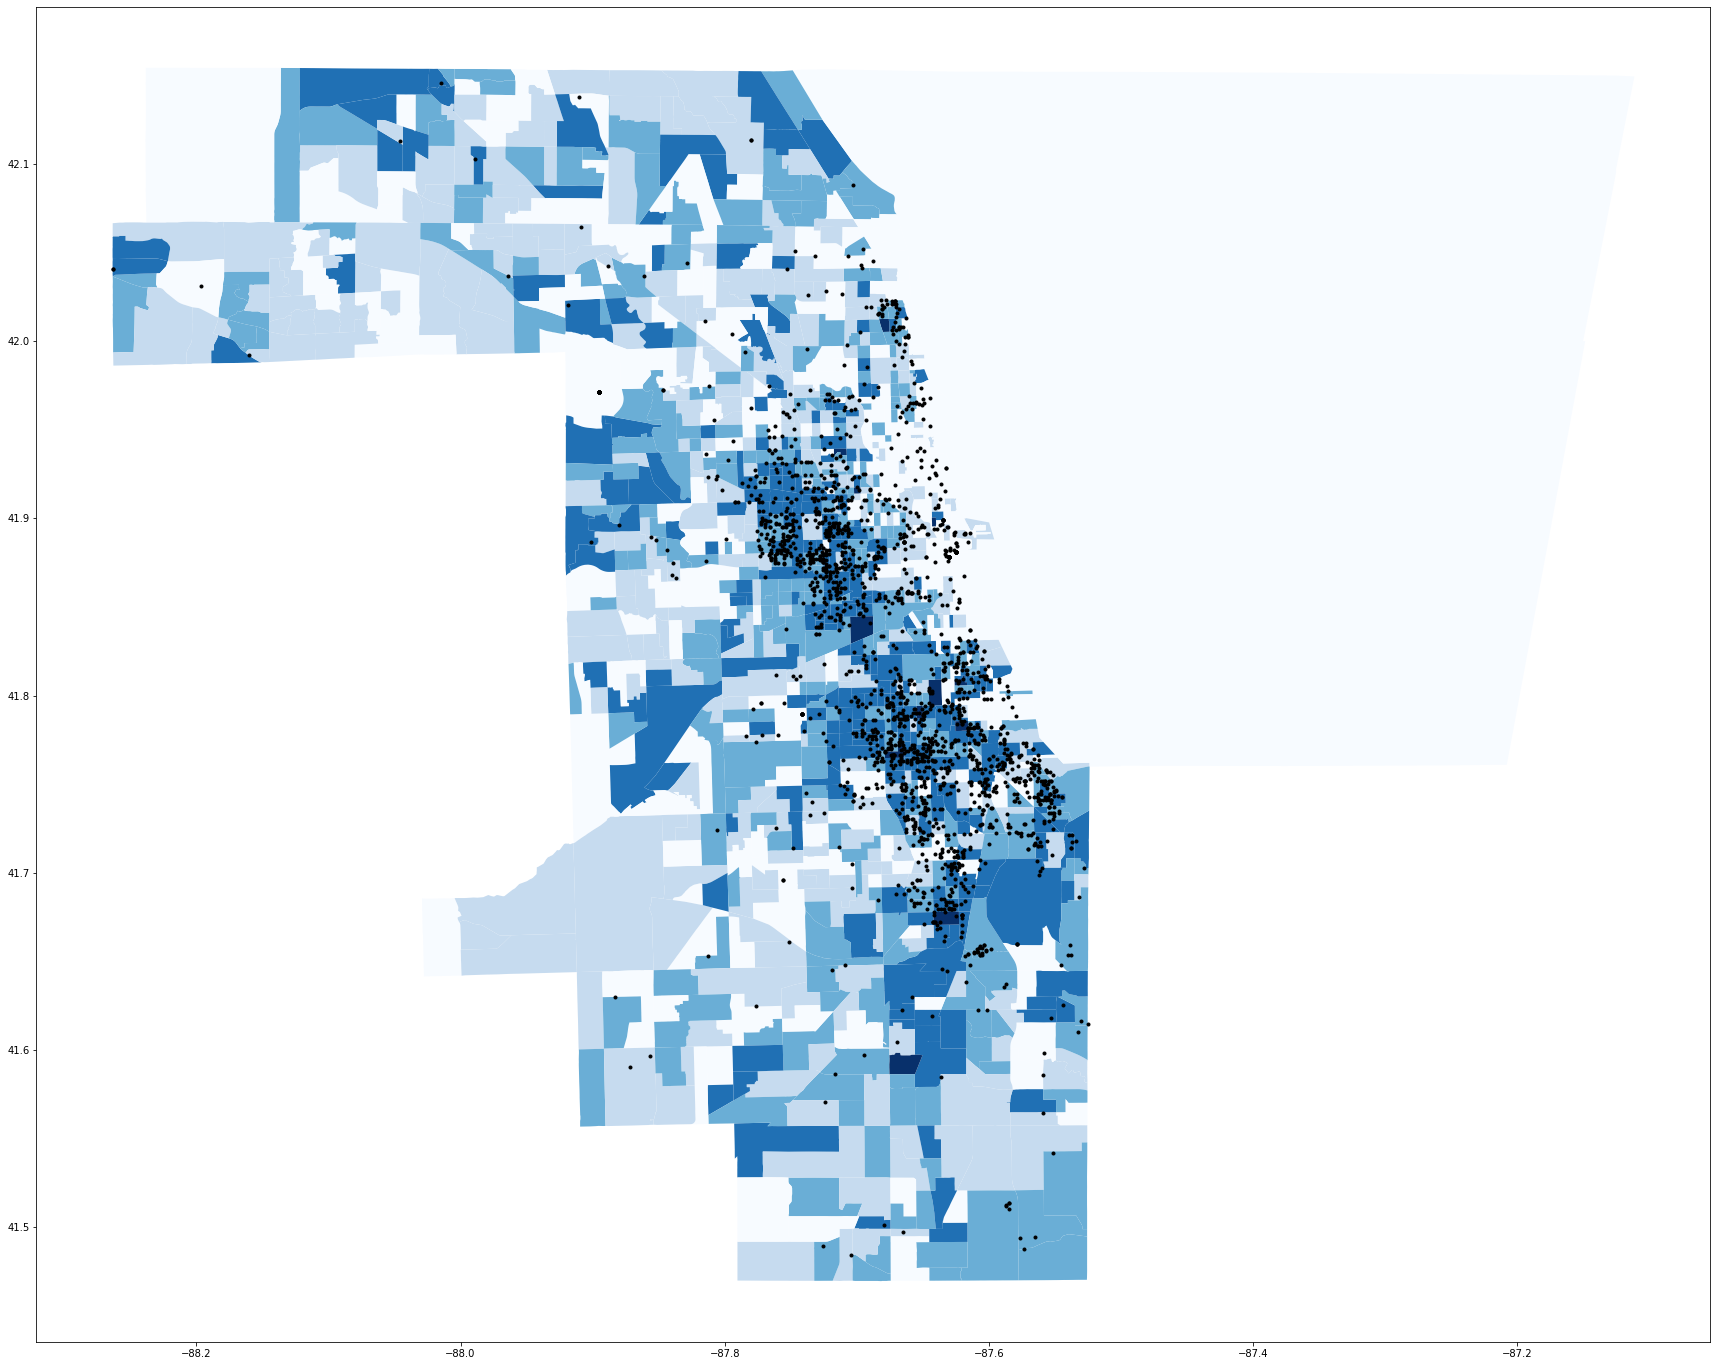

In [ ]:
fig, ax = plt.subplots(figsize=(30, 30))
ST17GDF[ST17GDF['COUNTYFP']=='031'].plot(column='NHIPCT', cmap='Blues', ax=ax, scheme="boxplot")

# iterate through year file
for incident in GDF14.loc['17031', 'incidentList']:
  plt.plot(incident['longitude'], incident['latitude'], 'k.')

plt.show()

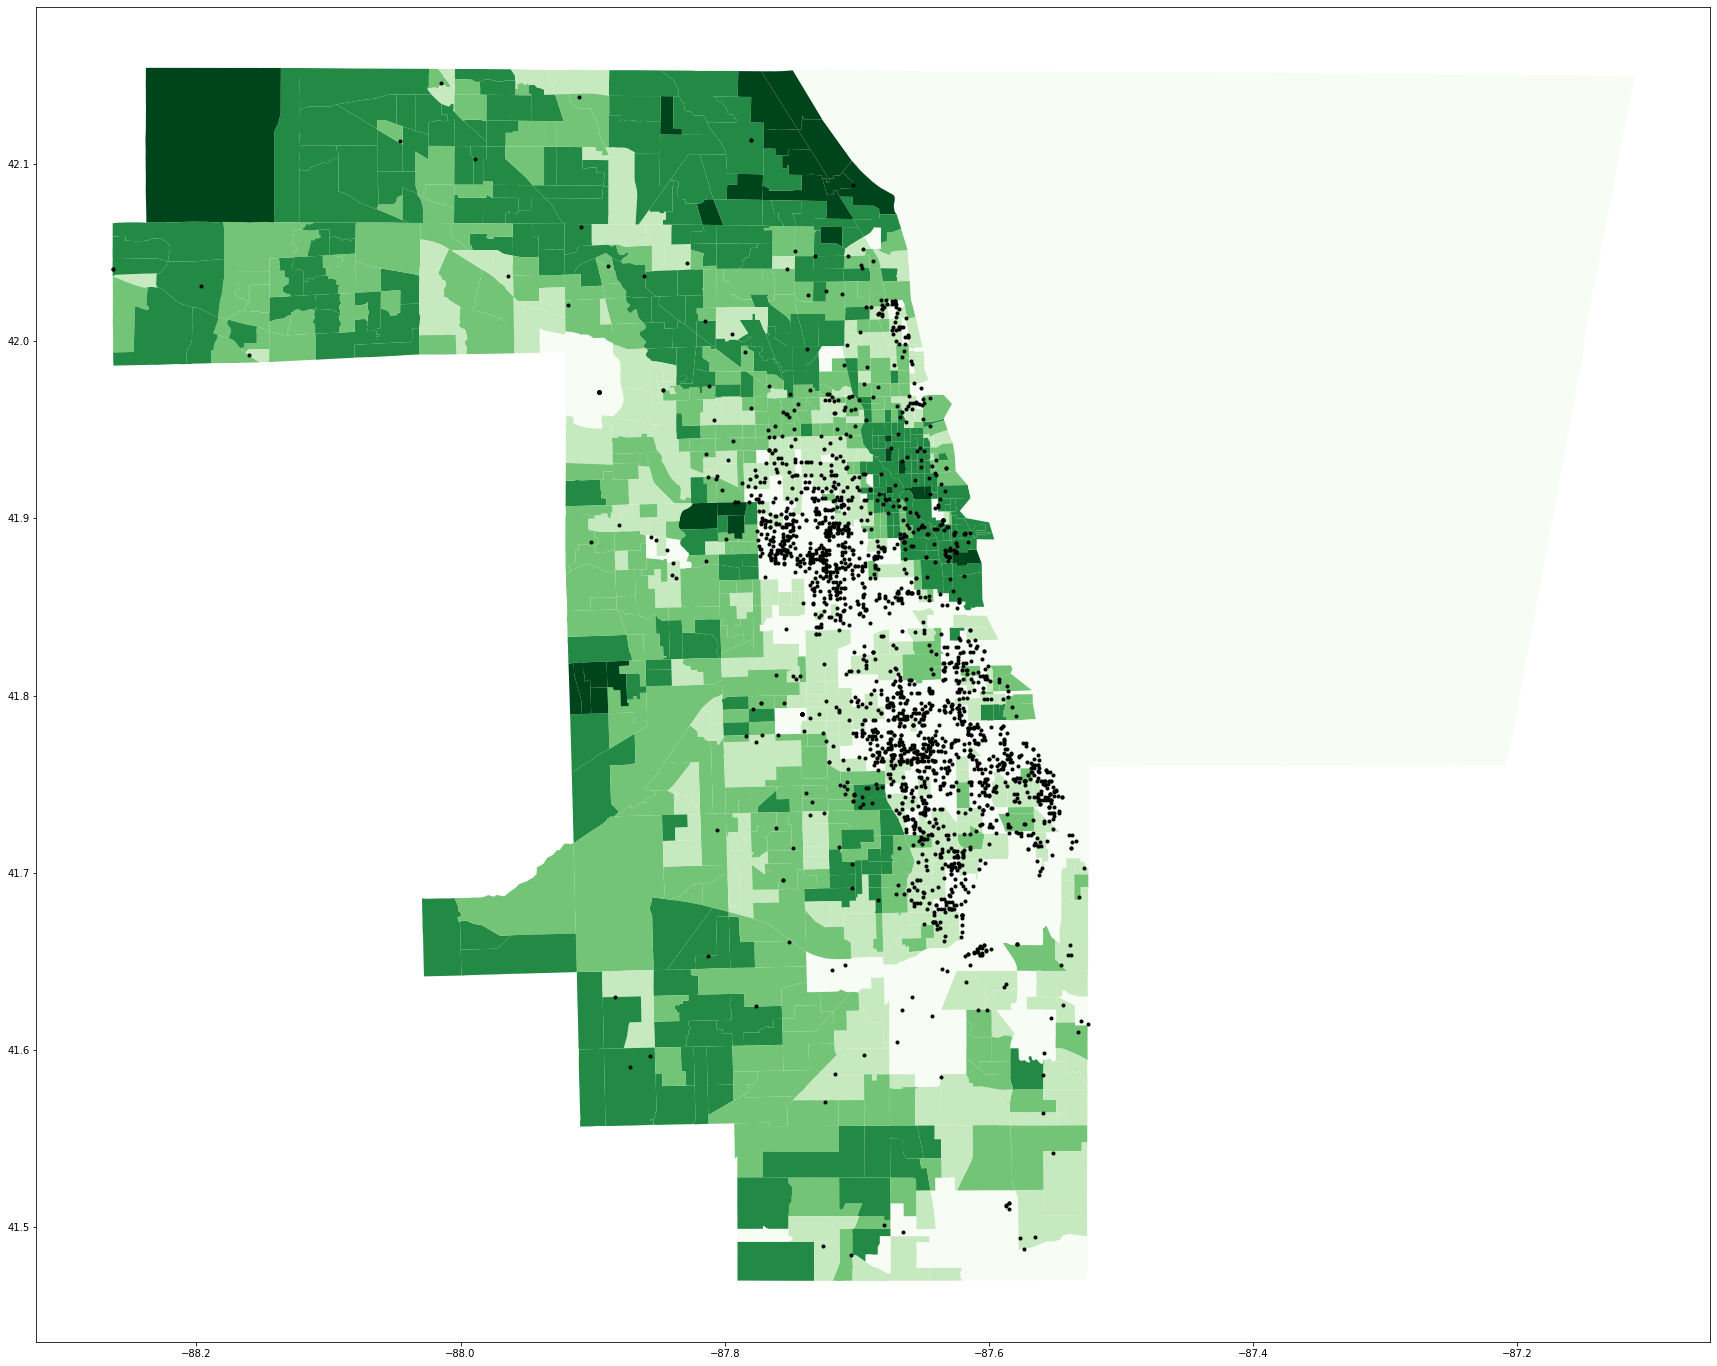

In [ ]:
fig, ax = plt.subplots(figsize=(30, 30))
ST17GDF[ST17GDF['COUNTYFP']=='031'].plot(column='MEDINC', cmap='Greens', ax=ax, scheme="boxplot")

# iterate through year file
for incident in GDF14.loc['17031', 'incidentList']:
  plt.plot(incident['longitude'], incident['latitude'], 'k.')

plt.show()